In [1]:
import json
import numpy as np
import pandas as pd

In [2]:
from run_config_json import create_run_config_json

In [41]:
STATE_NAMES_KEY = "stateTimeMap"
TOTAL_TIME_KEY = "t_total"

In [53]:
num_runs = 2
num_nodes = 27
num_consensus = 500
starting_seed = 0
seed_multiplier = 100
node_processing_rate = 3
# switch_processing_rate = -1
base_time_limit = 10000
network_type = "FoldedClos"
validator_type = "HS"
network_parameters = [5, 1, 0]

In [54]:
VALIDATOR_RESULTS_FILEPATH = "../json/validator_results.json"

In [55]:
def process_results(results_dic: dict): 
    processed_results_dic = {}
    state_names = None
    for var in results_dic.keys():
        temp_dic = results_dic[var].copy()
        if state_names == None:
            state_names = temp_dic[STATE_NAMES_KEY].keys()
        for key in temp_dic[STATE_NAMES_KEY].keys():
            temp_dic[key] = temp_dic[STATE_NAMES_KEY][key]
        del temp_dic[STATE_NAMES_KEY]
        processed_results_dic[var] = temp_dic
    return (processed_results_dic, state_names) 


In [63]:
results_dic = {}
for switch_processing_rate in [1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 15, 18, 27, 54]:
    json_obj = create_run_config_json(num_runs, num_consensus, starting_seed, seed_multiplier,
                                      num_nodes, node_processing_rate, switch_processing_rate, base_time_limit, 
                                      network_type, validator_type, network_parameters)
    config_filename = "config.json"
    with open(config_filename, "w") as config_file:
        config_file.write(json_obj)
    argument = "py/" + config_filename
    ! (cd "../" && gradlew run --args={argument})
    with open(VALIDATOR_RESULTS_FILEPATH, "r") as validator_results_json:
        validator_results = json.load(validator_results_json)
    results_dic[switch_processing_rate] = validator_results

results_dic, state_names = process_results(results_dic)


> Task :compileJava UP-TO-DATE
> Task :processResources NO-SOURCE
> Task :classes UP-TO-DATE

> Task :run
Total node count: 54
Total consensus count: 500
Average time at state NEW_VIEW per node per instance: 0.0
Average time at state PREPARE per node per instance: 51.18852768079216
Average time at state PRE_COMMIT per node per instance: 54.61223184051282
Average time at state COMMIT per node per instance: 54.33616897664381
Average time at state DECIDE per node per instance: 54.1936313892149
Average time per consensus instance per node: 214.3305598871637
Total time: 107165.27994358185

Average queue stats
Average number of messages in queue: 0.015304199914537735
Average effective arrival rate: 0.03739084153103993
Average waiting time per message: 0.4093034360254499
Product of waiting time and arrival rate: 0.015304199914537736
Total time empty: 105684.35352059326
Total time: 107165.27994358185

BUILD SUCCESSFUL in 10s
2 actionable tasks: 1 executed, 1 up-to-date
> Task :compileJava UP-T

In [64]:
df = pd.DataFrame(results_dic).transpose()
df

,t_total,L,lambda,W,NEW_VIEW,PREPARE,PRE_COMMIT,COMMIT,DECIDE
1,214.330560,0.015304,0.037391,0.409303,0.0,51.188528,54.612232,54.336169,54.193631
2,107.366330,0.042333,0.074642,0.567150,0.0,25.674178,27.425044,27.072789,27.194319
3,72.644229,0.090704,0.110318,0.822201,0.0,17.486120,18.463532,18.329438,18.365139
4,56.950671,0.155143,0.140718,1.102511,0.0,13.759526,14.431102,14.389263,14.370780
5,49.105593,0.216560,0.163199,1.326965,0.0,11.815247,12.476768,12.385314,12.428264
6,44.674373,0.274319,0.179387,1.529203,0.0,10.637979,11.386776,11.333630,11.315986
7,41.909579,0.322217,0.191221,1.685050,0.0,9.998258,10.635077,10.665120,10.611124
8,40.222573,0.365521,0.199241,1.834564,0.0,9.483296,10.231509,10.314156,10.193612
9,38.981478,0.406445,0.205585,1.977018,0.0,9.110424,9.931791,10.001582,9.937682
12,37.155164,0.497283,0.215690,2.305544,0.0,8.445965,9.538636,9.580792,9.589771


<AxesSubplot:>

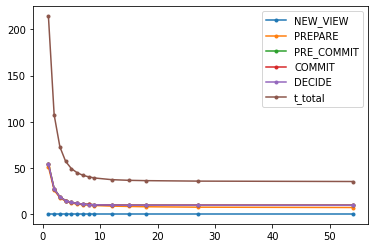

In [65]:
for key in state_names:
    df[key].plot(style=".-", legend=True)
df[TOTAL_TIME_KEY].plot(style=".-", legend=True)

In [66]:
df.to_csv("folded_clos_hs_switch_rate_5_0.csv")

In [67]:
pd.read_csv("folded_clos_switch_rate_5_0_0.csv")

,Unnamed: 0,t_newRound,t_prePrepared,t_prepared,t_roundChange,t_total,L,lambda,W
0,54,4.404770,6.489749,8.722790,0.0,19.617310,15.916752,2.803646,5.677161
1,27,3.835030,7.038992,9.772186,0.0,20.646207,6.645943,2.663928,2.494791
2,18,4.409241,10.400975,13.962531,0.0,28.772747,2.153927,1.911531,1.126807
3,17,4.592126,11.054297,14.694242,0.0,30.340665,1.904288,1.813210,1.050230
4,16,4.927740,11.780842,15.531115,0.0,32.239698,1.666036,1.706468,0.976307
5,15,5.306171,12.566419,16.554983,0.0,34.427573,1.433132,1.597934,0.896866
6,14,5.703674,13.469491,17.657617,0.0,36.830783,1.240455,1.493506,0.830566
7,13,6.210114,14.474960,18.982315,0.0,39.667388,1.059456,1.386807,0.763953
8,12,6.788881,15.611381,20.555373,0.0,42.955635,0.895867,1.280624,0.699555
9,11,7.395675,17.047472,22.381703,0.0,46.824851,0.751173,1.175145,0.639218
